# Feature Engineering in Previous Data Set

### 0. Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',300)
pd.set_option('display.float_format',lambda x: '%.3f' % x)
pd.set_option('display.max_colwidth',30)

- import pickle data apps01

In [4]:
with open('apps01.pkl', 'rb') as f:
    apps = pd.read_pickle(f)

In [6]:
app_train = apps[apps['TARGET'].notnull()]
app_test = apps[apps['TARGET'].isnull()]

In [7]:
app_test['TARGET'].value_counts(dropna=False)

TARGET
NaN    48744
Name: count, dtype: int64

- load previous Data

In [8]:
prev = pd.read_csv('data/previous_application.csv')

In [23]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Y,1,0.000,0.183,0.867,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest,365243.000,-42.000,300.000,-42.000,-37.000,0.000
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,NaN,607500.000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low,365243.000,-134.000,916.000,365243.000,365243.000,1.000
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,NaN,112500.000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high,365243.000,-271.000,59.000,365243.000,365243.000,1.000
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,NaN,450000.000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle,365243.000,-482.000,-152.000,-182.000,-177.000,1.000
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,NaN,337500.000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### *After feature engineering of prev, it will be merged with apps on SK_ID_CURR*

In [24]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [57]:
prev.isnull().sum()
# RATE_INTEREST_PRIMARY and RATE_INTEREST_SECONDARY have too many missing values 

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### 1. Visualize histogram for numerical features when TARGET is 0 and 1 respectively 

In [9]:
# merge with app_tran to get a TARGET column 
app_prev = prev.merge(app_train[['SK_ID_CURR','TARGET']], on= 'SK_ID_CURR', how='left')

In [11]:
def show_hist_by_target(df, features):
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)

    for feature in features:
        fig, ax = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(12,4))
        sns.violinplot(x='TARGET', y=feature, data= df, ax= ax[0][0])
        sns.histplot(df[cond0][feature],stat='density',bins=50, color='blue',kde=True, ax=ax[0][1])
        sns.histplot(df[cond1][feature],stat='density',bins= 50, color='red',kde=True, ax=ax[0][1])  
        plt.show()

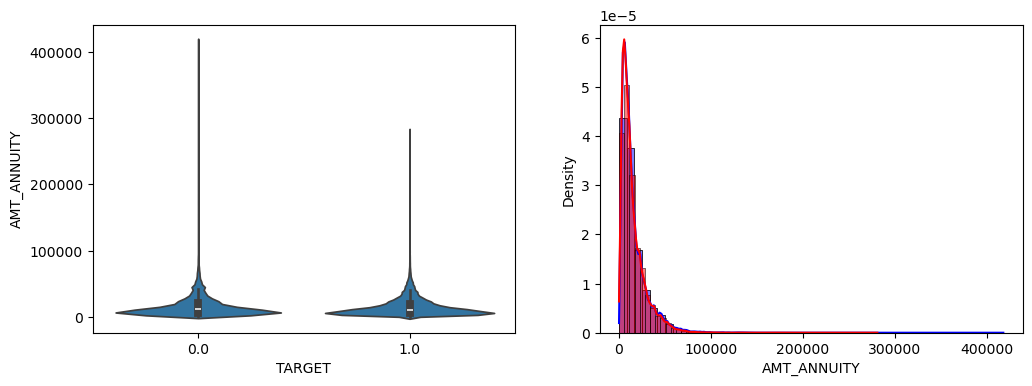

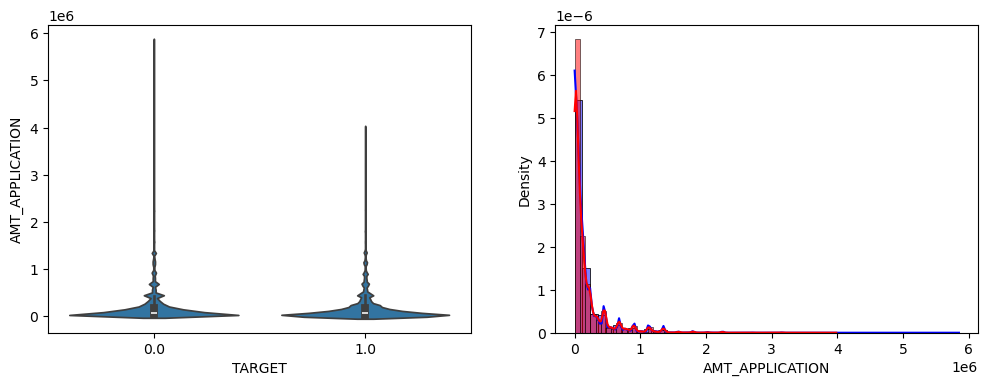

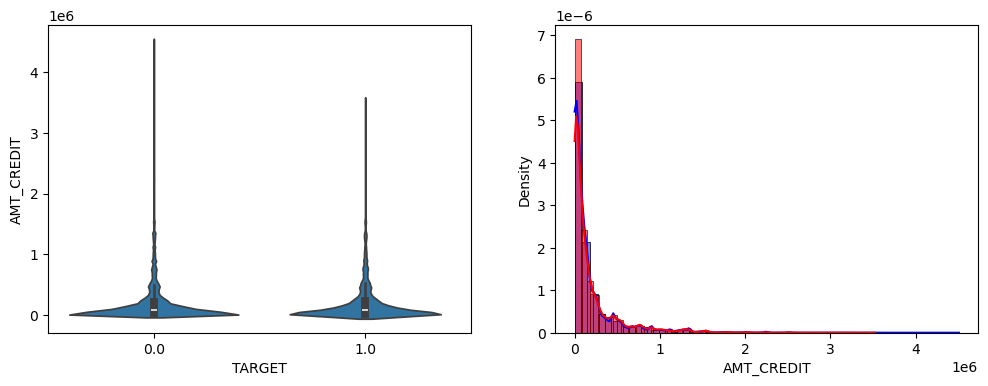

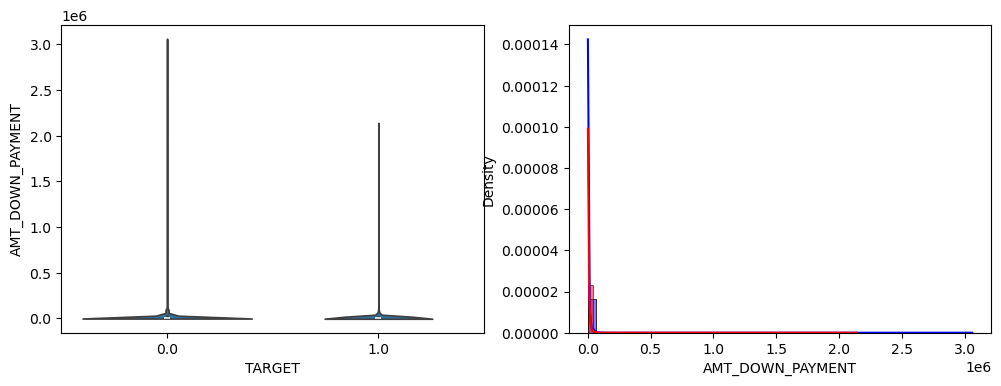

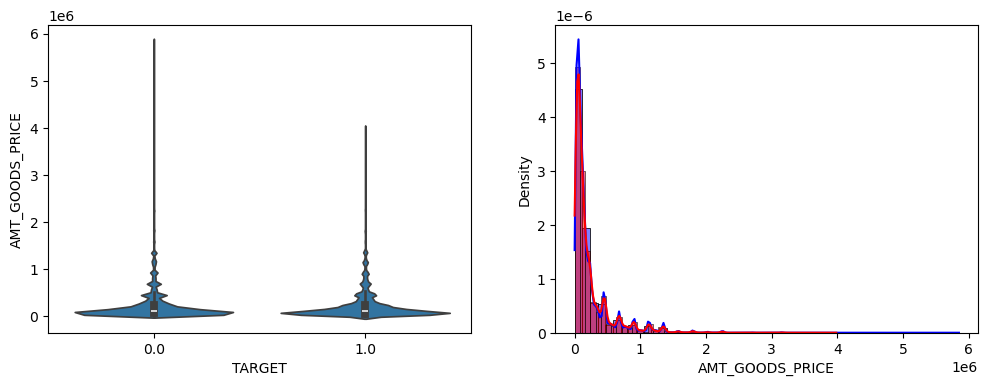

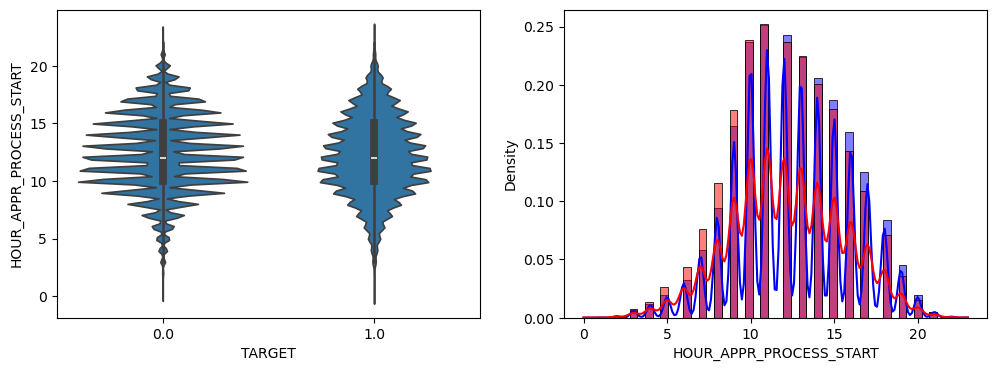

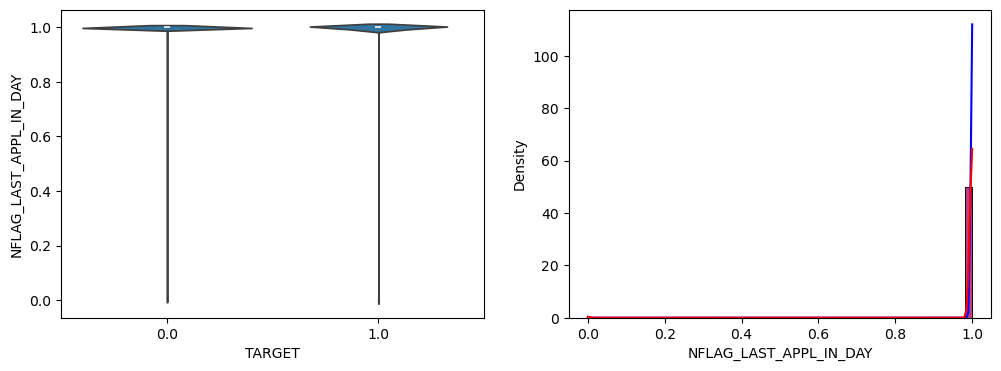

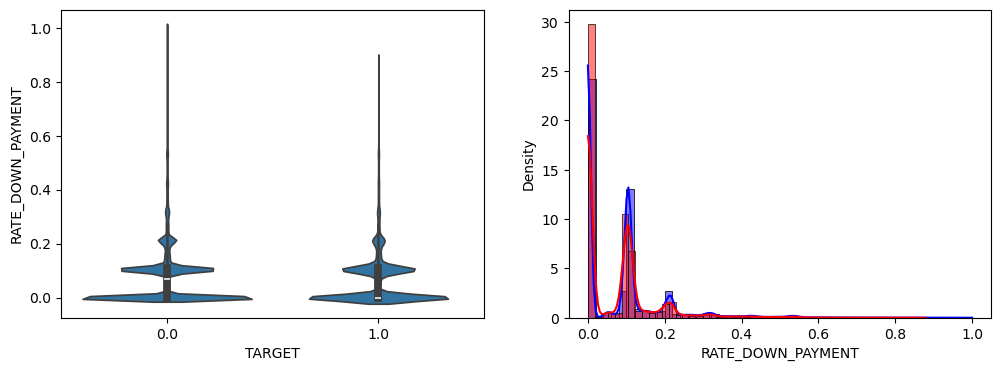

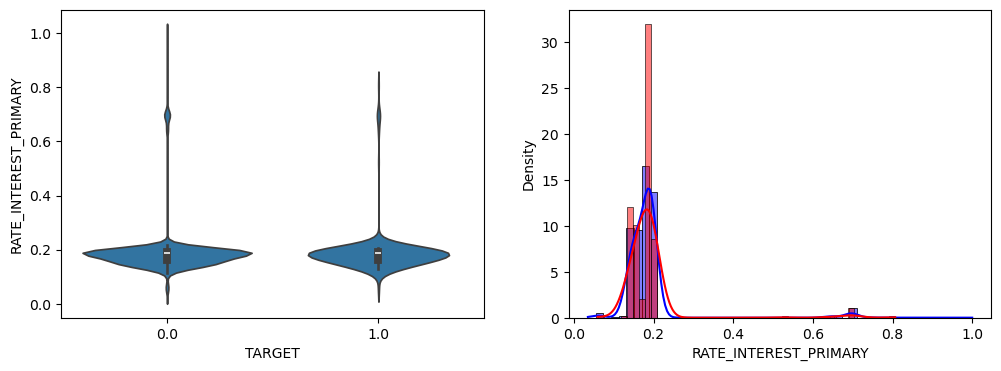

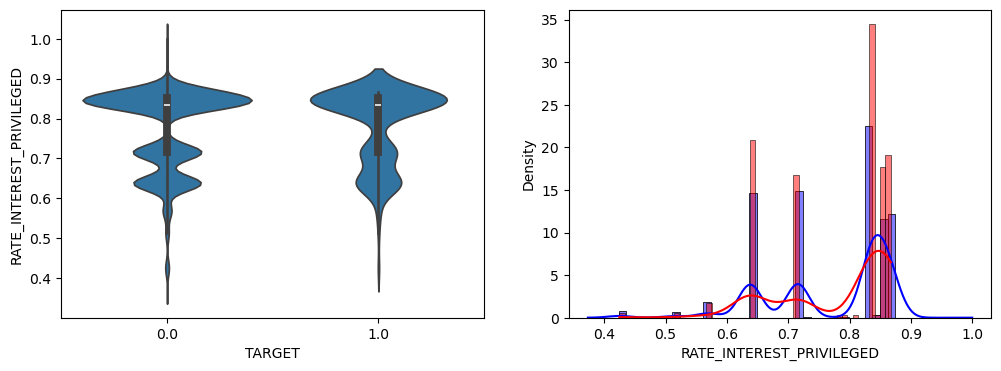

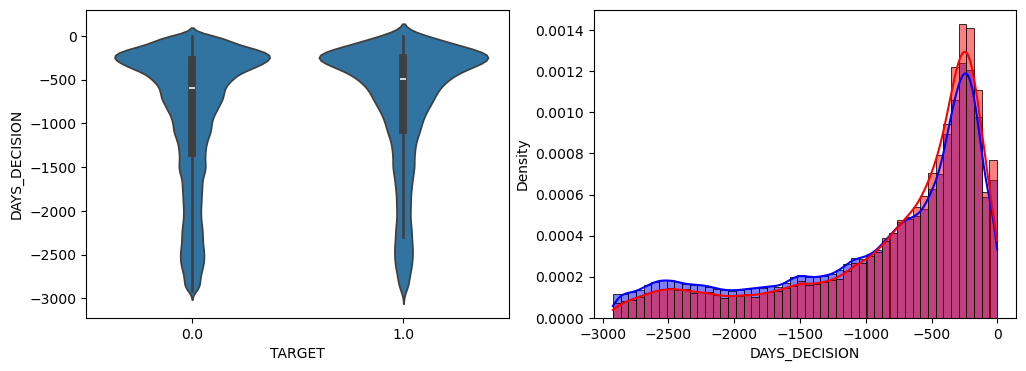

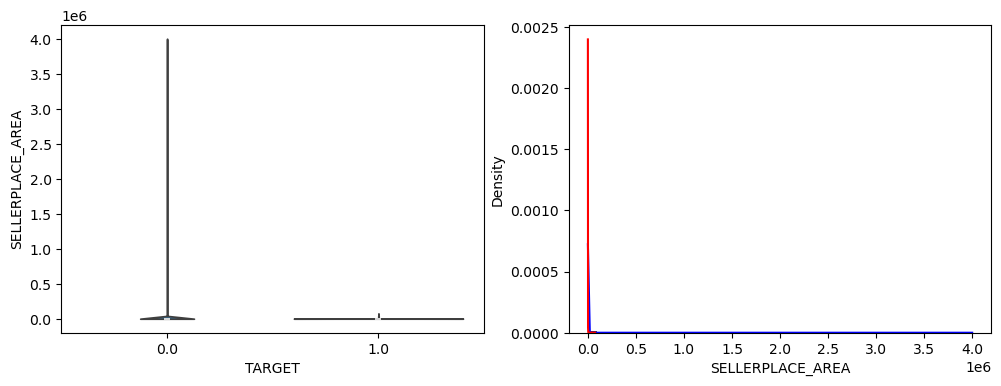

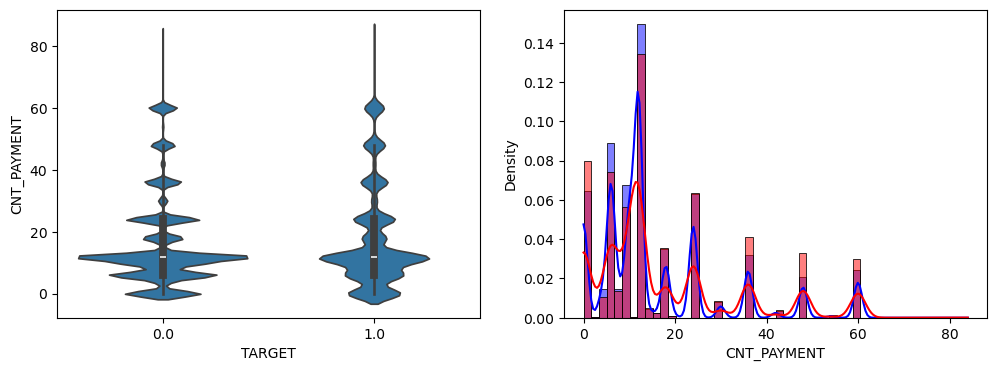

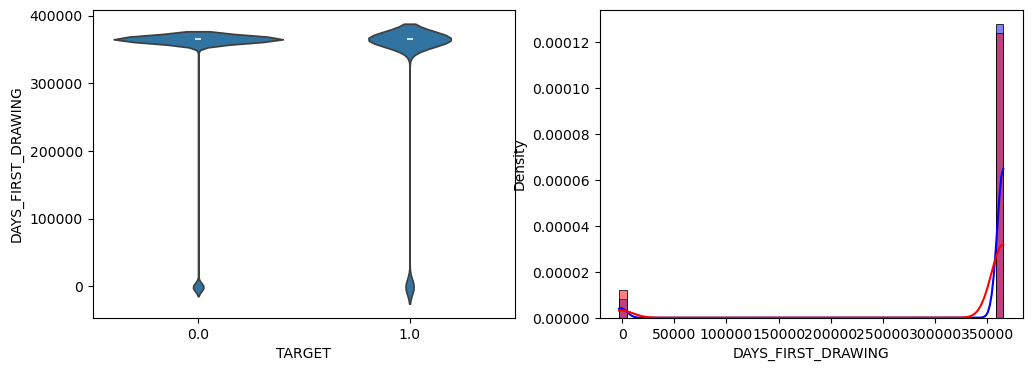

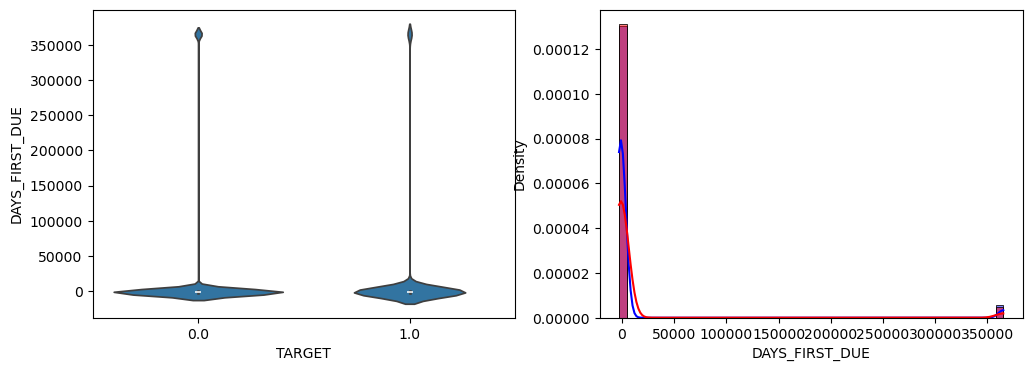

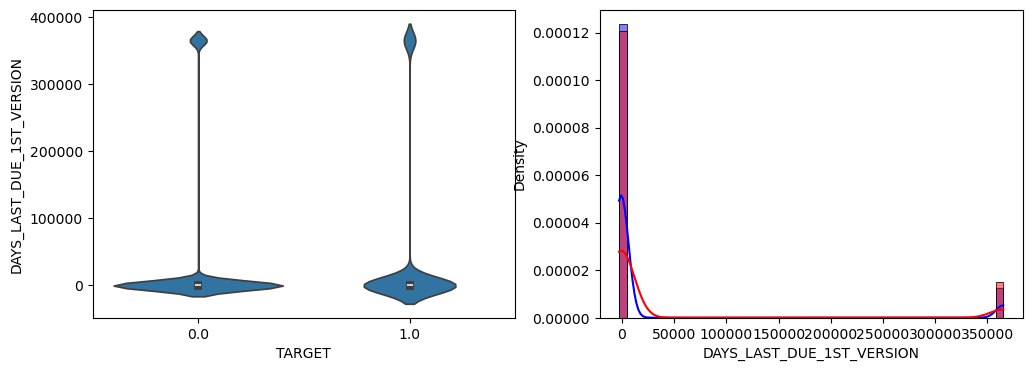

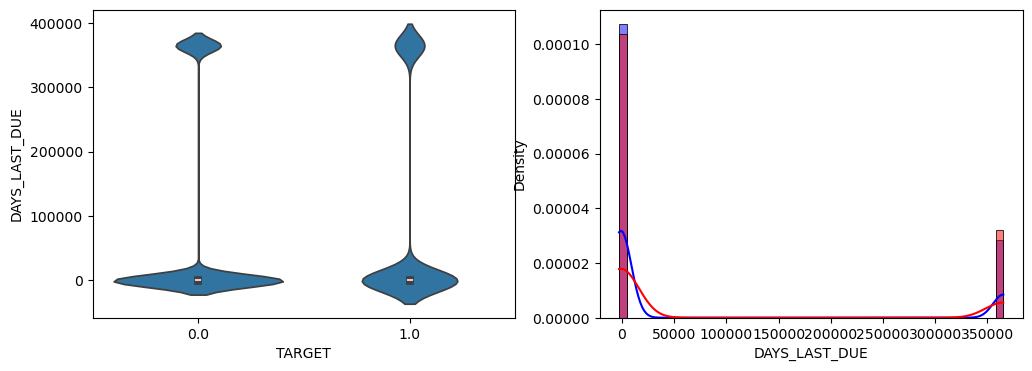

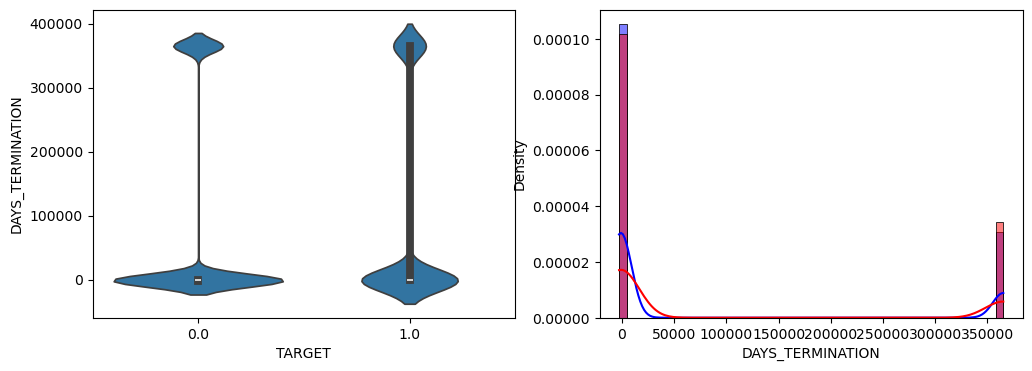

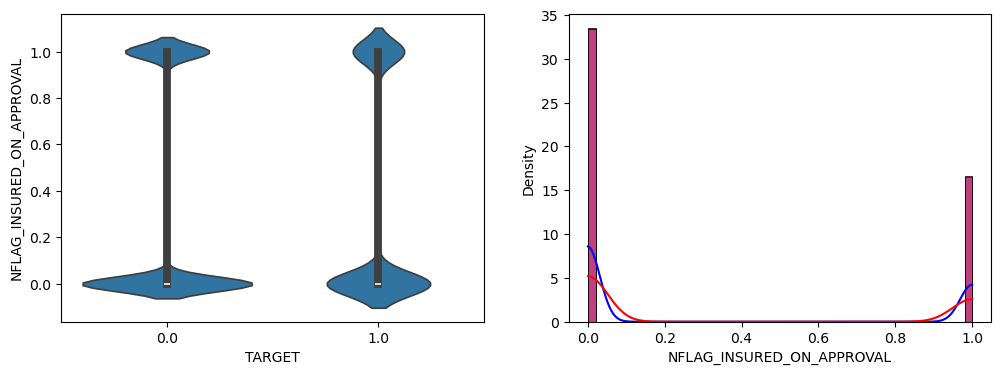

In [12]:
num_columns = app_prev.dtypes[app_prev.dtypes != 'object'].index.tolist()
num_columns = [column for column in num_columns if column not in ['SK_ID_PREV','SK_ID_CURR','TARGET']]
show_hist_by_target(app_prev,num_columns)

### 2. Visualize sns.catplot for object features

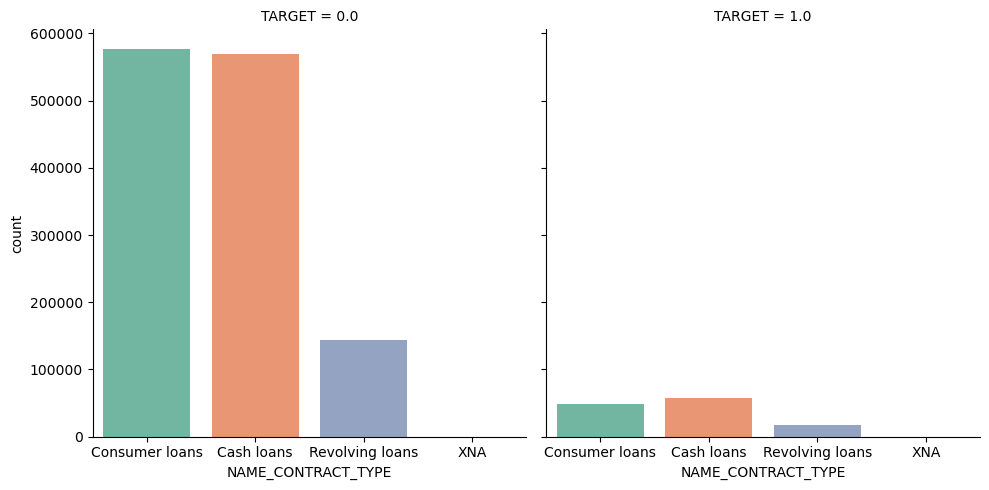

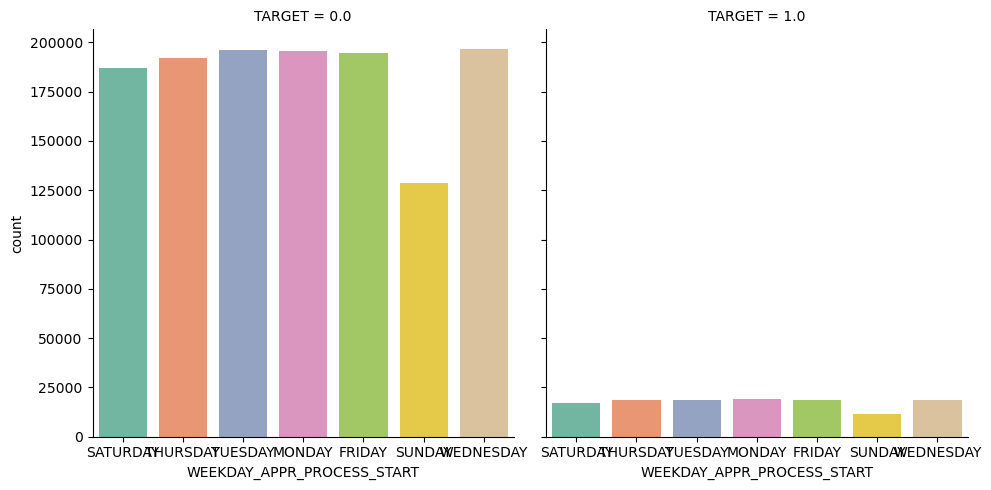

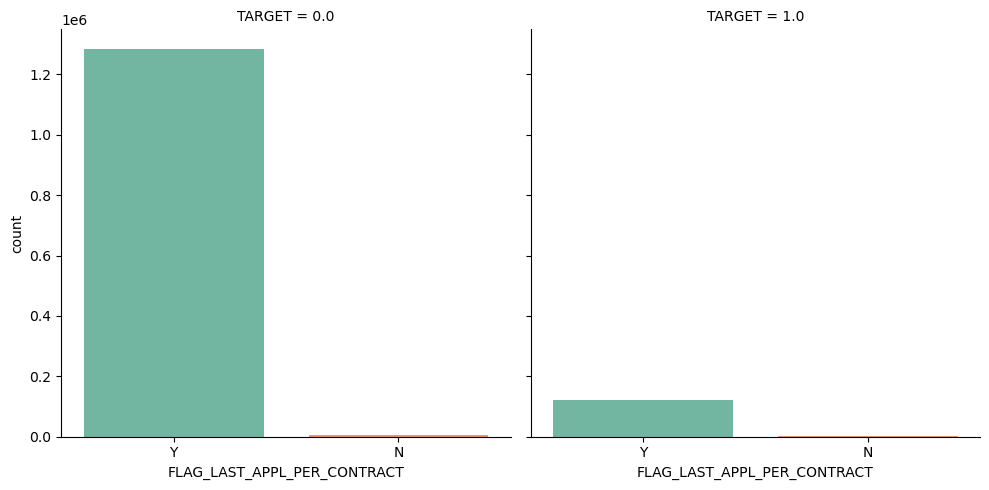

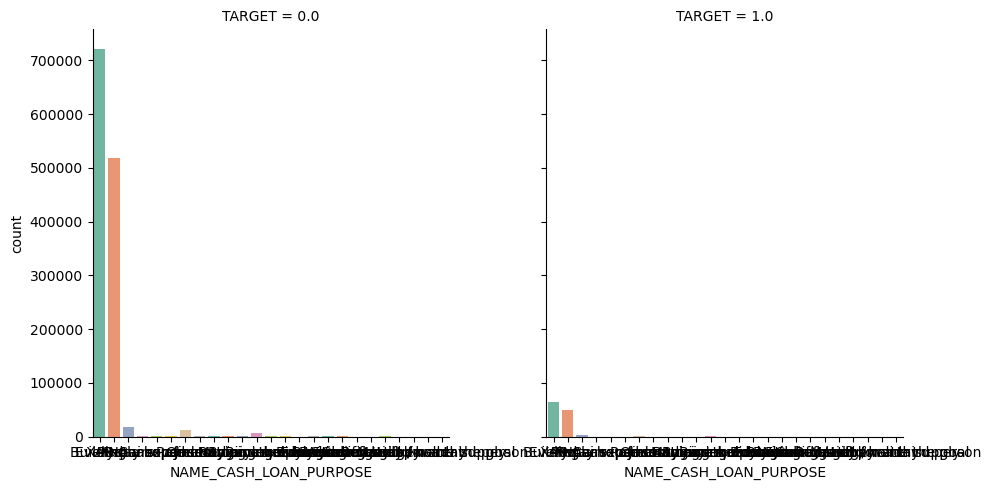

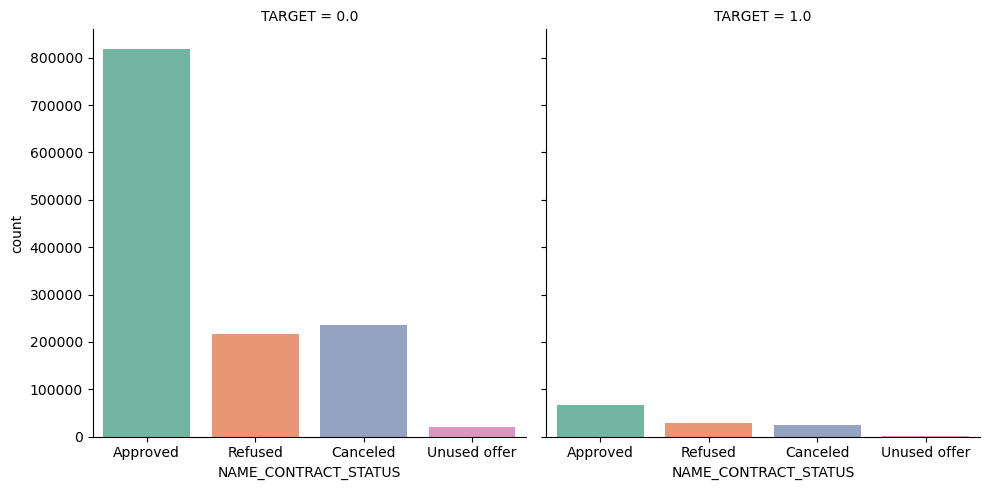

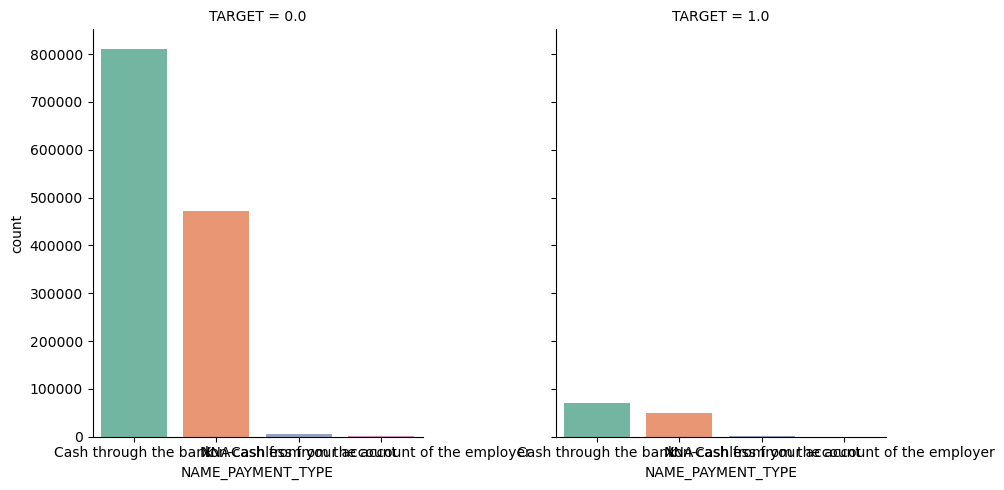

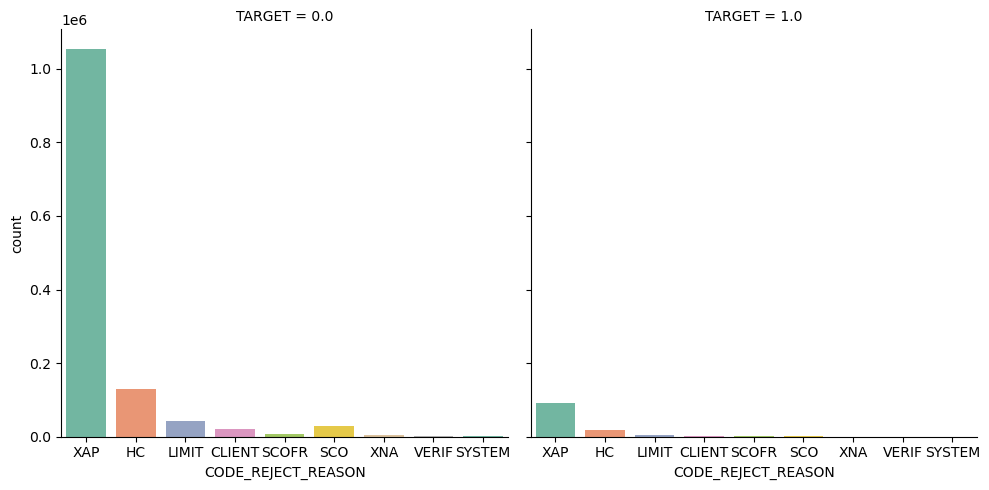

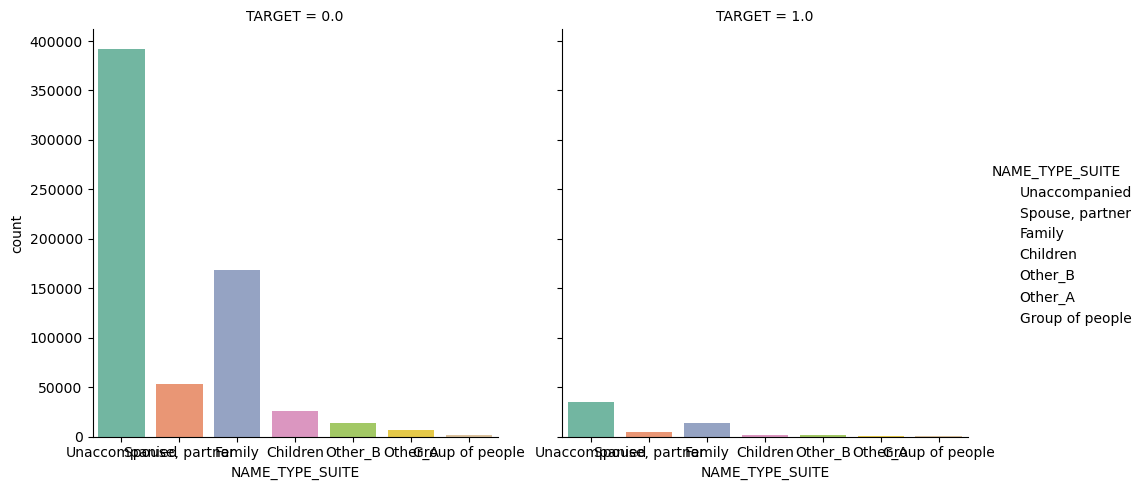

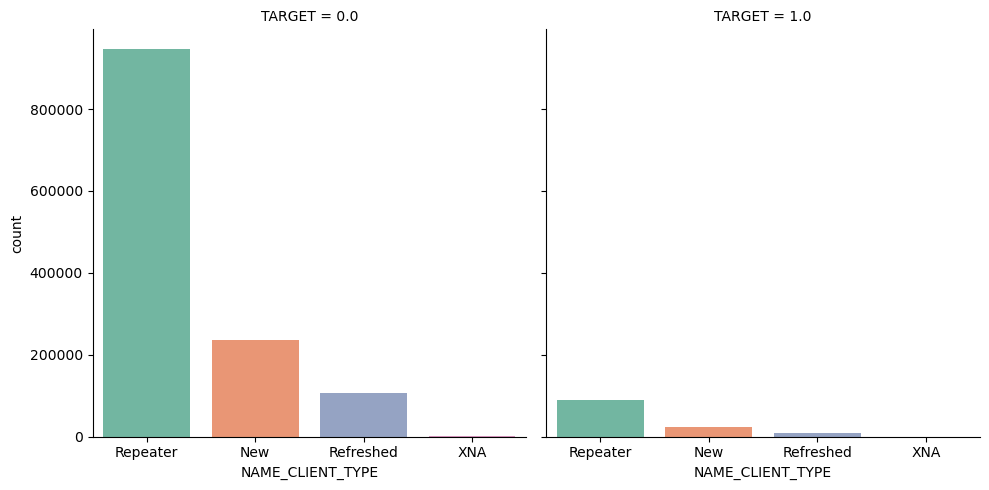

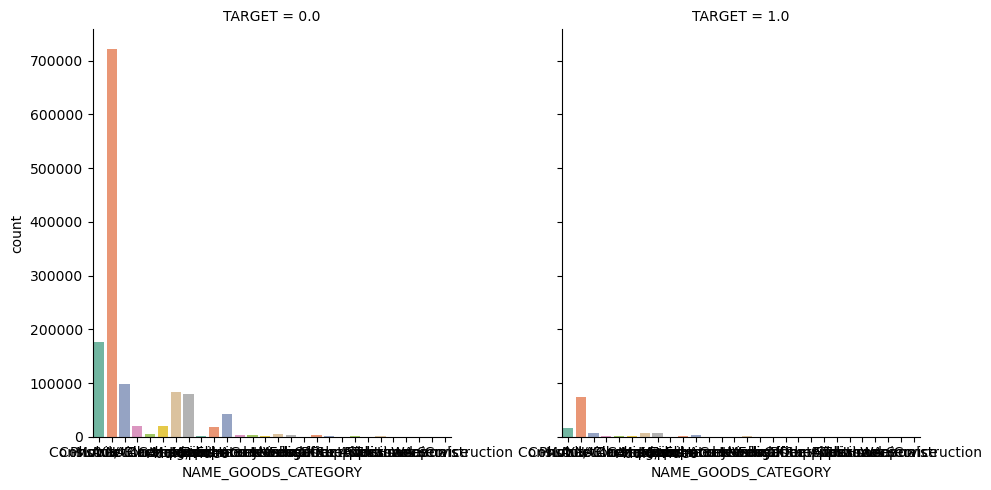

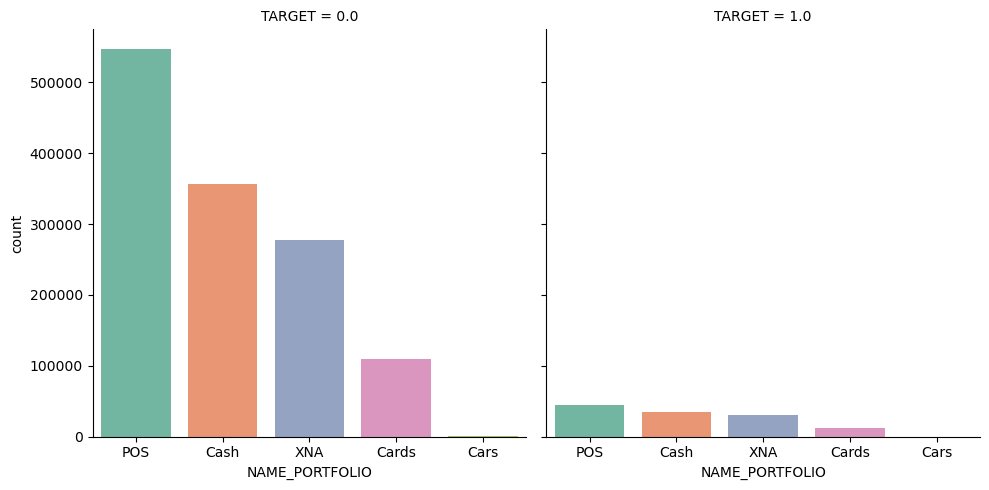

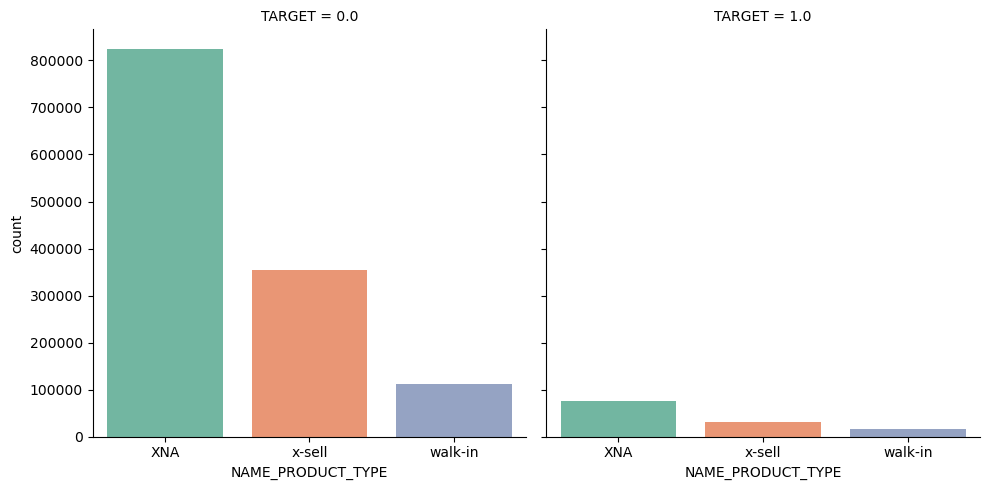

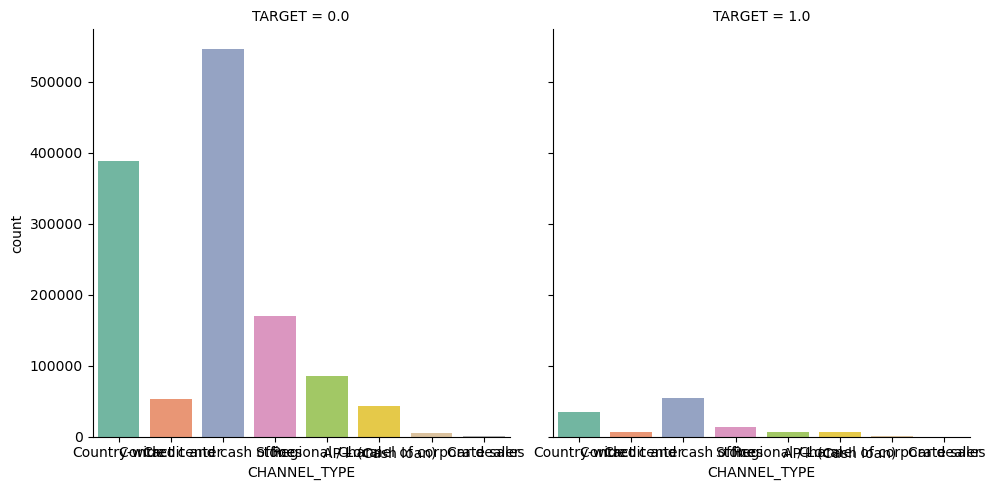

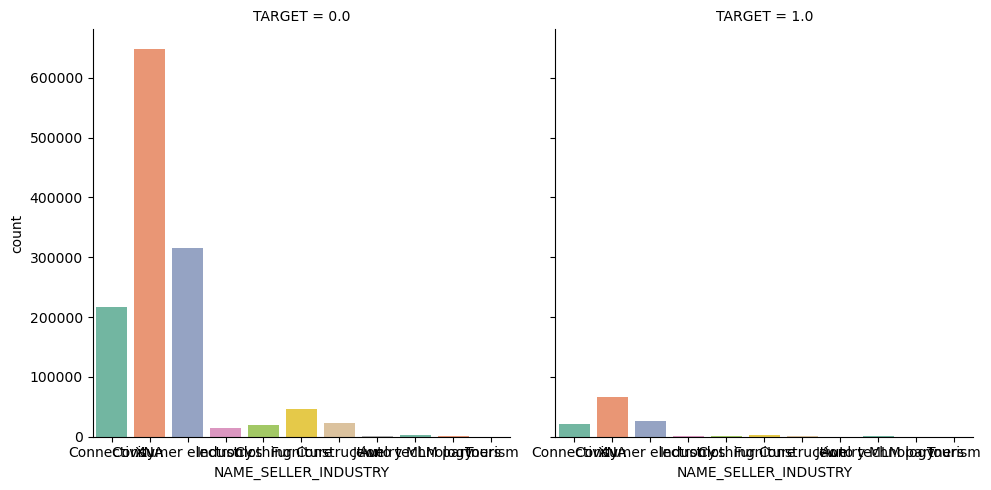

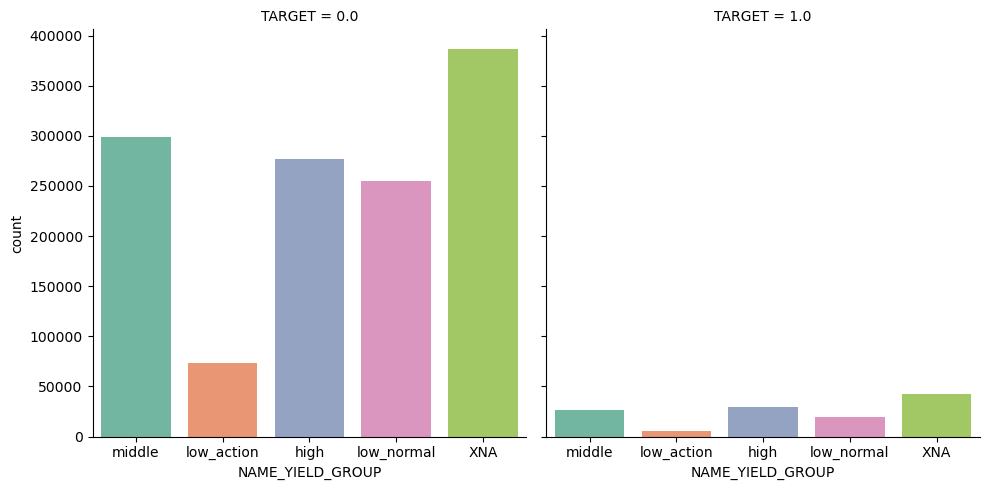

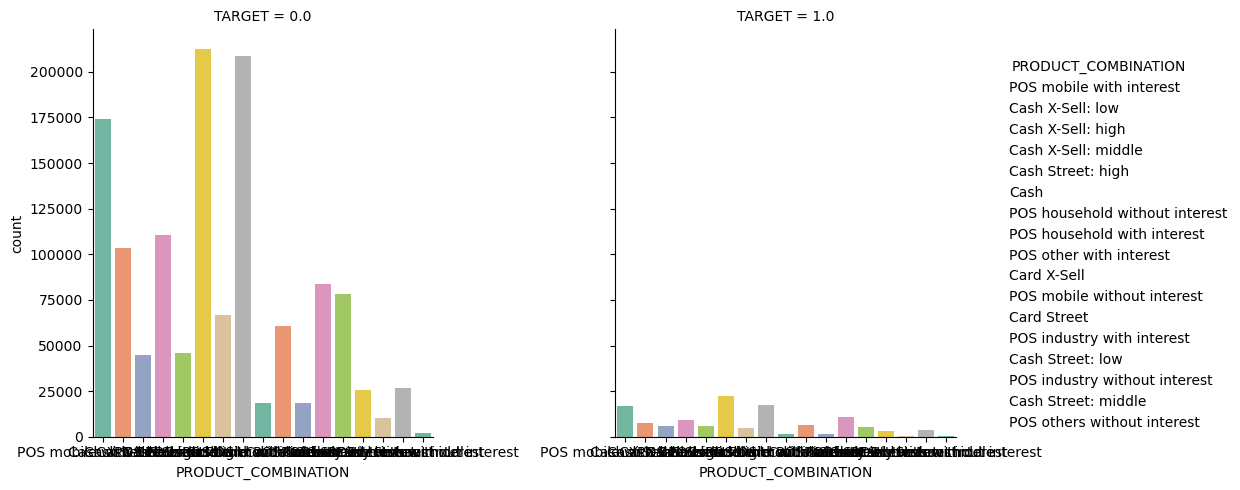

In [62]:
object_columns = app_prev.dtypes[app_prev.dtypes == 'object'].index.tolist()

def show_catplot_by_target(df, features):
    for feature in features:
        sns.catplot(x= feature, col='TARGET', data=df, kind='count',palette='Set2')
        plt.show()
        
show_catplot_by_target(app_prev,object_columns)

### 3. Feature Engineering

- prev features 

In [13]:
prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT']/prev['AMT_APPLICATION']
prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY']/prev['AMT_APPLICATION']
prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE']/prev['AMT_APPLICATION']

- DAYS features have outlier (365243)

In [14]:
prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

In [15]:
prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']

- Set a new column with respect to *interest rate*

In [16]:
# Calculate total payment amount
total_payment = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']

# Calculate interest rate: (Total Payment - Principal) / (Principal * Number of Payments)
prev['INTEREST_RATE'] = (total_payment - prev['AMT_CREDIT']) / (prev['AMT_CREDIT'] * prev['CNT_PAYMENT'])


In [17]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,PREV_CREDIT_DIFF,PREV_GOODS_DIFF,PREV_CREDIT_APPL_RATIO,PREV_ANNUITY_APPL_RATIO,PREV_GOODS_APPL_RATIO,PREV_DAYS_LAST_DUE_DIFF,INTEREST_RATE
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,0.000,17145.000,SATURDAY,15,Y,1,0.000,0.183,0.867,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest,NaN,-42.000,300.000,-42.000,-37.000,0.000,0.000,0.000,1.000,0.101,1.000,342.000,0.018
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,NaN,607500.000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low,NaN,-134.000,916.000,NaN,NaN,1.000,-72171.000,0.000,1.119,0.041,1.000,NaN,0.009
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,NaN,112500.000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high,NaN,-271.000,59.000,NaN,NaN,1.000,-23944.500,0.000,1.213,0.134,1.000,NaN,0.027
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,NaN,450000.000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle,NaN,-482.000,-152.000,-182.000,-177.000,1.000,-20790.000,0.000,1.046,0.105,1.000,30.000,0.017
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,NaN,337500.000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,-66555.000,0.000,1.197,0.095,1.000,NaN,0.037


- carry out aggregation

In [18]:
agg_dict = {
    'SK_ID_CURR':['count'],
    'AMT_CREDIT':['mean', 'max', 'sum'],
    'AMT_ANNUITY':['mean', 'max', 'sum'], 
    'AMT_APPLICATION':['mean', 'max', 'sum'],
    'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
    'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
    
    'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
    'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
    'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
    'PREV_GOODS_APPL_RATIO':['mean', 'max'],
    'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
    'INTEREST_RATE':['mean', 'max']
}

In [19]:
prev_agg = prev.groupby('SK_ID_CURR').agg(agg_dict)

In [20]:
prev_agg.head()
# column names must be changed

SK_ID_CURR AMT_CREDIT                         AMT_ANNUITY  \
                count       mean         max         sum        mean   
SK_ID_CURR                                                             
100001              1  23787.000   23787.000   23787.000    3951.000   
100002              1 179055.000  179055.000  179055.000    9251.775   
100003              3 484191.000 1035882.000 1452573.000   56553.990   
100004              1  20106.000   20106.000   20106.000    5357.250   
100005              2  20076.750   40153.500   40153.500    4813.200   

                                AMT_APPLICATION                         \
                 max        sum            mean        max         sum   
SK_ID_CURR                                                               
100001      3951.000   3951.000       24835.500  24835.500   24835.500   
100002      9251.775   9251.775      179055.000 179055.000  179055.000   
100003     98356.995 169661.970      435436.500 900000.000 1306309.500   
100004      5357.250   5357.250       24282.000  24282.000   24282.000   
100005      4813.200   4813.200       22308.750  44617.500   44617.500   

           AMT_DOWN_PAYMENT                   AMT_GOODS_PRICE             \
                       mean      max      sum            mean        max   
SK_ID_CURR                                                                 
100001             2520.000 2520.000 2520.000       24835.500  24835.500   
100002                0.000    0.000    0.000      179055.000 179055.000   
100003             3442.500 6885.000 6885.000      435436.500 900000.000   
100004             4860.000 4860.000 4860.000       24282.000  24282.000   
100005             4464.000 4464.000 4464.000       44617.500  44617.500   

                       RATE_DOWN_PAYMENT             DAYS_DECISION        \
                   sum               min   max  mean           min   max   
SK_ID_CURR                                                                 
100001       24835.500             0.104 0.104 0.104         -1740 -1740   
100002      179055.000             0.000 0.000 0.000          -606  -606   
100003     1306309.500             0.000 0.100 0.050         -2341  -746   
100004       24282.000             0.212 0.212 0.212          -815  -815   
100005       44617.500             0.109 0.109 0.109          -757  -315   

                     CNT_PAYMENT        PREV_CREDIT_DIFF                       \
                mean        mean    sum             mean      max         sum   
SK_ID_CURR                                                                      
100001     -1740.000       8.000  8.000         1048.500 1048.500    1048.500   
100002      -606.000      24.000 24.000            0.000    0.000       0.000   
100003     -1305.000      10.000 30.000       -48754.500  756.000 -146263.500   
100004      -815.000       4.000  4.000         4176.000 4176.000    4176.000   
100005      -536.000      12.000 12.000         2232.000 4464.000    4464.000   

           PREV_CREDIT_APPL_RATIO       PREV_GOODS_DIFF              \
                             mean   max            mean   max   sum   
SK_ID_CURR                                                            
100001                      0.958 0.958           0.000 0.000 0.000   
100002                      1.000 1.000           0.000 0.000 0.000   
100003                      1.058 1.151           0.000 0.000 0.000   
100004                      0.828 0.828           0.000 0.000 0.000   
100005                      0.900 0.900           0.000 0.000 0.000   

           PREV_GOODS_APPL_RATIO       PREV_DAYS_LAST_DUE_DIFF          \
                            mean   max                    mean     max   
SK_ID_CURR                                                               
100001                     1.000 1.000                 120.000 120.000   
100002                     1.000 1.000                 150.000 150.000   
100003                     1.000 1.

In [21]:
prev_agg.columns = ['PREV_' +('_').join(col).upper() for col in prev_agg.columns.ravel()]

- NAME_CONTRACT_STATUS when 'Approved' and 'Refused'

In [22]:
prev[['NAME_CONTRACT_STATUS']].value_counts()

NAME_CONTRACT_STATUS
Approved                1036781
Canceled                 316319
Refused                  290678
Unused offer              26436
Name: count, dtype: int64

In [23]:
prev_contract_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Refused','Approved'])]\
    .groupby(['SK_ID_CURR','NAME_CONTRACT_STATUS'])

prev_contract_group = prev_contract_group['SK_ID_CURR'].count()


In [24]:
prev_contract_group = prev_contract_group.unstack()
prev_contract_group.columns = ['PREV_AMT_CREDIT_APPROVED','PREV_AMT_CREDIT_REFUSED']
prev_contract_group.head()

,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED
SK_ID_CURR,,
100001,1.000,NaN
100002,1.000,NaN
100003,3.000,NaN
100004,1.000,NaN
100005,1.000,NaN


In [25]:
prev_contract_group = prev_contract_group.reset_index()

prev_agg = prev_agg.merge(prev_contract_group, on='SK_ID_CURR', how='left')

In [26]:
prev_agg.head()
# too many missing values in PREV_AMT_CREDIT_REFUSED

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MAX,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED
0,100001,1,23787.000,23787.000,23787.000,3951.000,3951.000,3951.000,24835.500,24835.500,24835.500,2520.000,2520.000,2520.000,24835.500,24835.500,24835.500,0.104,0.104,0.104,-1740,-1740,-1740.000,8.000,8.000,1048.500,1048.500,1048.500,0.958,0.958,0.000,0.000,0.000,1.000,1.000,120.000,120.000,120.000,0.041,0.041,1.000,NaN
1,100002,1,179055.000,179055.000,179055.000,9251.775,9251.775,9251.775,179055.000,179055.000,179055.000,0.000,0.000,0.000,179055.000,179055.000,179055.000,0.000,0.000,0.000,-606,-606,-606.000,24.000,24.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,150.000,150.000,150.000,0.010,0.010,1.000,NaN
2,100003,3,484191.000,1035882.000,1452573.000,56553.990,98356.995,169661.970,435436.500,900000.000,1306309.500,3442.500,6885.000,6885.000,435436.500,900000.000,1306309.500,0.000,0.100,0.050,-2341,-746,-1305.000,10.000,30.000,-48754.500,756.000,-146263.500,1.058,1.151,0.000,0.000,0.000,1.000,1.000,50.000,150.000,150.000,0.015,0.019,3.000,NaN
3,100004,1,20106.000,20106.000,20106.000,5357.250,5357.250,5357.250,24282.000,24282.000,24282.000,4860.000,4860.000,4860.000,24282.000,24282.000,24282.000,0.212,0.212,0.212,-815,-815,-815.000,4.000,4.000,4176.000,4176.000,4176.000,0.828,0.828,0.000,0.000,0.000,1.000,1.000,30.000,30.000,30.000,0.016,0.016,1.000,NaN
4,100005,2,20076.750,40153.500,40153.500,4813.200,4813.200,4813.200,22308.750,44617.500,44617.500,4464.000,4464.000,4464.000,44617.500,44617.500,44617.500,0.109,0.109,0.109,-757,-315,-536.000,12.000,12.000,2232.000,4464.000,4464.000,0.900,0.900,0.000,0.000,0.000,1.000,1.000,90.000,90.000,90.000,0.037,0.037,1.000,NaN


In [27]:
prev_agg['PREV_AMT_CREDIT_REFUSED'] = prev_agg['PREV_AMT_CREDIT_REFUSED'].fillna(0)

In [28]:
prev_agg.head()

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MAX,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED
0,100001,1,23787.000,23787.000,23787.000,3951.000,3951.000,3951.000,24835.500,24835.500,24835.500,2520.000,2520.000,2520.000,24835.500,24835.500,24835.500,0.104,0.104,0.104,-1740,-1740,-1740.000,8.000,8.000,1048.500,1048.500,1048.500,0.958,0.958,0.000,0.000,0.000,1.000,1.000,120.000,120.000,120.000,0.041,0.041,1.000,0.000
1,100002,1,179055.000,179055.000,179055.000,9251.775,9251.775,9251.775,179055.000,179055.000,179055.000,0.000,0.000,0.000,179055.000,179055.000,179055.000,0.000,0.000,0.000,-606,-606,-606.000,24.000,24.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,150.000,150.000,150.000,0.010,0.010,1.000,0.000
2,100003,3,484191.000,1035882.000,1452573.000,56553.990,98356.995,169661.970,435436.500,900000.000,1306309.500,3442.500,6885.000,6885.000,435436.500,900000.000,1306309.500,0.000,0.100,0.050,-2341,-746,-1305.000,10.000,30.000,-48754.500,756.000,-146263.500,1.058,1.151,0.000,0.000,0.000,1.000,1.000,50.000,150.000,150.000,0.015,0.019,3.000,0.000
3,100004,1,20106.000,20106.000,20106.000,5357.250,5357.250,5357.250,24282.000,24282.000,24282.000,4860.000,4860.000,4860.000,24282.000,24282.000,24282.000,0.212,0.212,0.212,-815,-815,-815.000,4.000,4.000,4176.000,4176.000,4176.000,0.828,0.828,0.000,0.000,0.000,1.000,1.000,30.000,30.000,30.000,0.016,0.016,1.000,0.000
4,100005,2,20076.750,40153.500,40153.500,4813.200,4813.200,4813.200,22308.750,44617.500,44617.500,4464.000,4464.000,4464.000,44617.500,44617.500,44617.500,0.109,0.109,0.109,-757,-315,-536.000,12.000,12.000,2232.000,4464.000,4464.000,0.900,0.900,0.000,0.000,0.000,1.000,1.000,90.000,90.000,90.000,0.037,0.037,1.000,0.000


### 4. merge previous data with apps 

In [29]:
apps = apps.merge(prev_agg, on= 'SK_ID_CURR', how= 'left')

In [30]:
apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD,APPS_ANNUITY_CREDIT_RATIO,APPS_GOODS_CREDIT_RATIO,APPS_CREDIT_GOODS_DIFF,APPS_ANNUITY_INCOME_RATIO,APPS_CREDIT_INCOME_RATIO,APPS_GOODS_INCOME_RATIO,APPS_EMPLOYED_BIRTH_RATIO,APPS_INCOME_EMPLOYED_RATIO,APPS_INCOME_BIRTH_RATIO,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MAX,PREV_AMT_CREDIT_APPROVED,PREV_AMT_CREDIT_REFUSED
0,100002,1.000,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637.000,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,

### 5. Save this apps data as pickle file 

In [31]:
import pickle

with open ('apps02.pkl','wb') as f:
    pickle.dump(apps, f)